# Radius of Earth Lab
### Author: Ayush Pandhi (1003227457)
### Date: November 12, 2018

In [21]:
#Importing required modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [22]:
#Defining the linear model function
def f(x, a, b):
    return a*x + b

In [23]:
#Loading the data for all 3 runs
floor = np.loadtxt('Radius of Earth Set 1.txt', skiprows=2, usecols=(0,))
mgals1 = (1000)*(0.10023)*(np.loadtxt('Radius of Earth Set 1.txt', skiprows=2, usecols=(1,)))
mgals2 = (1000)*(0.10023)*(np.loadtxt('Radius of Earth Set 2.txt', skiprows=2, usecols=(1,)))
mgals3 = (1000)*(0.10023)*(np.loadtxt('Radius of Earth Set 3.txt', skiprows=2, usecols=(1,)))
    
#Getting a new data set of the averages and setting error to standard deviation
mgals_mean = np.empty(11,)
mgals_std = np.empty(11,)
for i in range(len(mgals_mean)):
    a = np.array([mgals1[i], mgals2[i], mgals3[i]])
    mgals_mean[i] = np.mean(a)
    mgals_std[i] = np.std(a)
    
g = 9.81 - mgals_mean/100000
delg = np.empty(11,)
for i in range(len(delg)):
    delg[i] = g[i] - g[0]
g_error = 1000*mgals_std*0.10023/100000

In [24]:
#Linear regression
p_opt_1, p_cov_1 = curve_fit(f, floor, delg, (0, 0), g_error, True) 
lin_output = f(floor, p_opt_1[0], p_opt_1[1])
print('The two estimated parameters: ', p_opt_1[0],  p_opt_1[1])

The two estimated parameters:  1.1718683276483365e-05 -3.573228732403936e-05


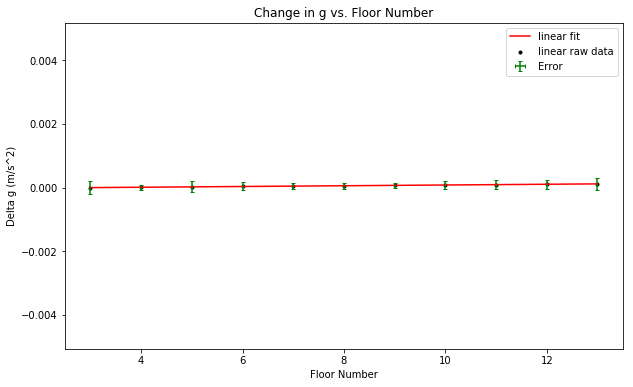

In [25]:
#Plots of linear regression
plt.figure(figsize=(10,6))
plt.scatter(floor, delg, label = 'linear raw data', marker='.', color='k')
plt.plot(floor, lin_output, 'r-', label = 'linear fit')
plt.title('Change in g vs. Floor Number')
plt.xlabel('Floor Number')
plt.ylabel('Delta g (m/s^2)')
plt.errorbar(floor, delg, xerr=0, yerr=g_error, linestyle='none', ecolor='g', label='Error', capsize=2)
plt.legend()
plt.show()

In [26]:
#Calculating chi squared
chi_sq = (1/9)*(np.sum(((delg - lin_output) / g_error)**2))
print('Chi squared for linear regression: ', chi_sq)

#Estimating the radius of Earth using linear portion of data
r = 2*(np.mean(g))/p_opt_1[0]
r = 3.95*r/1000
print('Estimated Radius in km: ', r)

Chi squared for linear regression:  2.1857907302628696e-05
Estimated Radius in km:  6612.816092337803
